## To-Do List:
    - More descriptive graphs
        - explain aggregation level (high school)   
        - more years of income data
        

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Make the graphs a bit prettier, and bigger
plt.rcParams['figure.figsize'] = (15, 5)

In [3]:
full_data = pd.read_csv('Full_data.csv')
full_data.head(5)

,Unnamed: 0,school,year,agency_code,zip_code,2019_med_hh_inc,AP_pass_pct,AP_part_pct,total_counselors,int_employ,...,enroll_EnglishLearners,enroll_Female,enroll_Hispanic,enroll_Male,enroll_Twoormore,enroll_PacificIslander,enroll_Disabilities,enroll_White,CTE_cred_pct,CTE_enroll_pct
0,0,Ardrey Kell High School,2015,600302,28277,109251.0,0.81,0.43,361.0,8.3,...,NaN,0.465600,NaN,0.401600,NaN,NaN,NaN,0.545600,NaN,NaN
1,1,Butler High School,2015,600361,28105,117852.0,0.67,0.23,361.0,8.3,...,NaN,0.342282,0.076063,0.322148,NaN,NaN,NaN,0.326622,NaN,NaN
2,2,Cato Middle College High School,2015,600334,28215,50704.0,0.52,0.52,361.0,8.3,...,NaN,0.500000,0.083333,0.402778,NaN,NaN,NaN,0.305556,NaN,NaN
3,3,East Mecklenburg High School,2015,600377,28212,46688.0,0.39,0.11,361.0,8.3,...,NaN,0.373684,0.078947,0.268421,NaN,NaN,NaN,0.194737,NaN,NaN
4,4,Garinger High School,2015,600397,28205,50200.0,0.11,NaN,361.0,8.3,...,0.053125,0.146875,0.059375,0.190625,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
full_data.columns

Index(['Unnamed: 0', 'school', 'year', 'agency_code', 'zip_code',
       '2019_med_hh_inc', 'AP_pass_pct', 'AP_part_pct', 'total_counselors',
       'int_employ', 'int_military', 'int_other', 'int_commcoll', 'int_privjr',
       'int_privsr', 'int_pubsr', 'int_tradesch', 'enroll_All',
       'enroll_AmericanIndian', 'enroll_Asian', 'enroll_Black',
       'enroll_Disadvantaged', 'enroll_EnglishLearners', 'enroll_Female',
       'enroll_Hispanic', 'enroll_Male', 'enroll_Twoormore',
       'enroll_PacificIslander', 'enroll_Disabilities', 'enroll_White',
       'CTE_cred_pct', 'CTE_enroll_pct'],
      dtype='object')

In [4]:
full_data.drop(columns='Unnamed: 0', axis=1, inplace=True)

In [5]:
full_data.head(5)

,school,year,agency_code,zip_code,2019_med_hh_inc,AP_pass_pct,AP_part_pct,total_counselors,int_employ,int_military,...,enroll_EnglishLearners,enroll_Female,enroll_Hispanic,enroll_Male,enroll_Twoormore,enroll_PacificIslander,enroll_Disabilities,enroll_White,CTE_cred_pct,CTE_enroll_pct
0,Ardrey Kell High School,2015,600302,28277,109251.0,0.81,0.43,361.0,8.3,2.9,...,NaN,0.465600,NaN,0.401600,NaN,NaN,NaN,0.545600,NaN,NaN
1,Butler High School,2015,600361,28105,117852.0,0.67,0.23,361.0,8.3,2.9,...,NaN,0.342282,0.076063,0.322148,NaN,NaN,NaN,0.326622,NaN,NaN
2,Cato Middle College High School,2015,600334,28215,50704.0,0.52,0.52,361.0,8.3,2.9,...,NaN,0.500000,0.083333,0.402778,NaN,NaN,NaN,0.305556,NaN,NaN
3,East Mecklenburg High School,2015,600377,28212,46688.0,0.39,0.11,361.0,8.3,2.9,...,NaN,0.373684,0.078947,0.268421,NaN,NaN,NaN,0.194737,NaN,NaN
4,Garinger High School,2015,600397,28205,50200.0,0.11,NaN,361.0,8.3,2.9,...,0.053125,0.146875,0.059375,0.190625,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
summary_stats = full_data.describe().drop(['25%','50%','75%'], axis=0).drop(['year', 'agency_code', 'zip_code', '2019_med_hh_inc'], axis=1)

In [7]:
summary_stats = summary_stats.append(full_data[summary_stats.columns].apply(lambda x: x.isna().sum()/x.size), ignore_index=True)

In [8]:
sum_stats_index = list(summary_stats.index)
sum_stats_index = sum_stats_index.append('missing')

In [9]:
summary_stats.index = ['count', 'mean', 'std', 'min', 'max', 'missing']

In [10]:
summary_stats

,AP_pass_pct,AP_part_pct,total_counselors,int_employ,int_military,int_other,int_commcoll,int_privjr,int_privsr,int_pubsr,...,enroll_EnglishLearners,enroll_Female,enroll_Hispanic,enroll_Male,enroll_Twoormore,enroll_PacificIslander,enroll_Disabilities,enroll_White,CTE_cred_pct,CTE_enroll_pct
count,136.000000,138.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,...,12.000000,91.000000,65.000000,87.000000,13.000000,0.0,16.000000,63.000000,19.000000,69.000000
mean,0.432072,0.216618,440.774648,11.238732,2.603521,1.750704,33.807042,0.325352,8.745775,40.578873,...,0.301253,0.481588,0.253135,0.397970,0.648385,NaN,0.393806,0.520827,16.263158,65.907391
std,0.233878,0.125331,46.768995,2.657703,0.303271,0.812294,1.924631,0.109439,0.633869,1.484044,...,0.159839,0.186517,0.191562,0.180068,0.214936,NaN,0.119850,0.250642,14.947471,14.796228
min,0.050000,0.000000,361.000000,8.300000,2.200000,1.000000,31.300000,0.200000,7.800000,38.400000,...,0.053125,0.146875,0.050439,0.114035,0.051282,NaN,0.235294,0.054795,0.000000,22.120000
max,0.840000,0.570000,508.000000,15.000000,3.000000,3.100000,36.900000,0.500000,9.500000,43.400000,...,0.550000,0.915709,0.700000,0.839623,0.933333,NaN,0.657143,0.905128,54.000000,97.990000
missing,0.042254,0.028169,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.915493,0.359155,0.542254,0.387324,0.908451,1.0,0.887324,0.556338,0.866197,0.514085


In [11]:
summary_stats.reset_index(inplace=True)

In [12]:
d = summary_stats.to_dict()

In [13]:
for x, v in d['AP_pass_pct'].items():
    print(x)
    print(str(v))

0
136.0
1
0.4320716396463235
2
0.2338775241314746
3
0.05
4
0.84
5
0.04225352112676056


In [14]:
for inner_key, values in d['AP_pass_pct'].items(): ## loop through each inner dictionary
            ## replace
    print(str(values))
    
    with open('table_template\\row_template.tex', 'r') as myfile:
    ## read the template
        text = myfile.read() 
        print(text)
        text.replace(' mean ', 'woof')
        print(text)

            ## open the table file 
        with open('table_template\\summary_stats.tex', 'a') as file:
            file.write(text)

136.0
 $KEY$ &  count  &  mean & std & min & max & missing  \\ 
 $KEY$ &  count  &  mean & std & min & max & missing  \\ 
0.4320716396463235
 $KEY$ &  count  &  mean & std & min & max & missing  \\ 
 $KEY$ &  count  &  mean & std & min & max & missing  \\ 
0.2338775241314746
 $KEY$ &  count  &  mean & std & min & max & missing  \\ 
 $KEY$ &  count  &  mean & std & min & max & missing  \\ 
0.05
 $KEY$ &  count  &  mean & std & min & max & missing  \\ 
 $KEY$ &  count  &  mean & std & min & max & missing  \\ 
0.84
 $KEY$ &  count  &  mean & std & min & max & missing  \\ 
 $KEY$ &  count  &  mean & std & min & max & missing  \\ 
0.04225352112676056
 $KEY$ &  count  &  mean & std & min & max & missing  \\ 
 $KEY$ &  count  &  mean & std & min & max & missing  \\ 


In [17]:
## loop through list of keys
# for key in list(d.keys()):
    
# ## open row template
#     with open('table_template\\row_template.tex', 'r') as myfile:
#     ## read the template
#         text = myfile.read() 

# ## fill in template 
#         ## variable - count - mean - std - min - max - missing
#         text = text.replace('$KEY$', key) ## name variable
#         #print(text)
#         for inner_key, values in d[key].items(): ## loop through each inner dictionary
#             ## replace
#             values = str(np.round(values, 2))
#             text = text.replace(inner_key, values)

#             ## open the table file 
#     with open('table_template\\summary_stats.tex', 'a') as file:
#         file.write(text + '\n')
        
# ## add to the table file

UFuncTypeError: ufunc 'multiply' did not contain a loop with signature matching types (dtype('<U32'), dtype('<U32')) -> dtype('<U32')

In [18]:
full_data.drop(columns='Unnamed: 0', axis=1, inplace=True)

KeyError: "['Unnamed: 0'] not found in axis"

In [16]:
# with open('\\table_template\row_template.tex', 'r') as myfile:
#     ## read the template
#     text = myfile.read() 
#     for key, value in player_dict.items(): ## fill out the template with the dictionary
#         text = text.replace('$' + key + '$', value) 
#         with open(player_path + x + ' Summary.tex', 'w') as file: ## open the working report
#             file.write(text) ## add the newest text in at the end


#     ## add the end document line
#     with open(team_folder + college + ' ' + team + ' Report_rough.tex', 'a') as myfile: 
#         myfile.write('\n\n\end{document}')

OSError: [Errno 22] Invalid argument: '\\table_template\row_template.tex'

In [19]:
full_data.columns

Index(['school', 'year', 'agency_code', 'zip_code', '2019_med_hh_inc',
       'AP_pass_pct', 'AP_part_pct', 'total_counselors', 'int_employ',
       'int_military', 'int_other', 'int_commcoll', 'int_privjr', 'int_privsr',
       'int_pubsr', 'int_tradesch', 'enroll_All', 'enroll_AmericanIndian',
       'enroll_Asian', 'enroll_Black', 'enroll_Disadvantaged',
       'enroll_EnglishLearners', 'enroll_Female', 'enroll_Hispanic',
       'enroll_Male', 'enroll_Twoormore', 'enroll_PacificIslander',
       'enroll_Disabilities', 'enroll_White', 'CTE_cred_pct',
       'CTE_enroll_pct'],
      dtype='object')

In [314]:
graph_data = full_data[['year', 'AP_pass_pct', 'AP_part_pct', 'total_counselors', 'int_commcoll',
       'int_pubsr','enroll_Disadvantaged', 'CTE_cred_pct',
       'CTE_enroll_pct']]

In [315]:
y_labels= ['Years', 'AP Pass Rate', 'AP Participation Rate', 'Total Counselors', 'HS Grad Intention: Community College',
       'HS Grad Intention: Public University', 'Econically Disadvantaged Students College Enrollment (%)', 'CTE Credentials Earned (%)',
       'CTE Student Enrollment (%)']

In [23]:
full_data

,school,year,agency_code,zip_code,2019_med_hh_inc,AP_pass_pct,AP_part_pct,total_counselors,int_employ,int_military,...,enroll_EnglishLearners,enroll_Female,enroll_Hispanic,enroll_Male,enroll_Twoormore,enroll_PacificIslander,enroll_Disabilities,enroll_White,CTE_cred_pct,CTE_enroll_pct
0,Ardrey Kell High School,2015,600302,28277,109251.0,0.810000,0.43000,361.0,8.3,2.9,...,NaN,0.465600,NaN,0.401600,NaN,NaN,NaN,0.545600,NaN,NaN
1,Butler High School,2015,600361,28105,117852.0,0.670000,0.23000,361.0,8.3,2.9,...,NaN,0.342282,0.076063,0.322148,NaN,NaN,NaN,0.326622,NaN,NaN
2,Cato Middle College High School,2015,600334,28215,50704.0,0.520000,0.52000,361.0,8.3,2.9,...,NaN,0.500000,0.083333,0.402778,NaN,NaN,NaN,0.305556,NaN,NaN
3,East Mecklenburg High School,2015,600377,28212,46688.0,0.390000,0.11000,361.0,8.3,2.9,...,NaN,0.373684,0.078947,0.268421,NaN,NaN,NaN,0.194737,NaN,NaN
4,Garinger High School,2015,600397,28205,50200.0,0.110000,NaN,361.0,8.3,2.9,...,0.053125,0.146875,0.059375,0.190625,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137,Rocky River High School,2020,600457,28227,43990.0,0.221698,0.11449,508.0,15.0,2.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,67.35
138,South Mecklenburg High School,2020,600535,28210,87928.0,0.600522,0.30399,508.0,15.0,2.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,62.60
139,West Charlotte High School,2020,600576,28216,64442.0,0.071429,0.09406,508.0,15.0,2.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,62.23
140,West Mecklenburg High School,2020,600579,28214,65706.0,0.117978,0.12241,508.0,15.0,2.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,82.72


AttributeError: 'Text' object has no property 'rot'

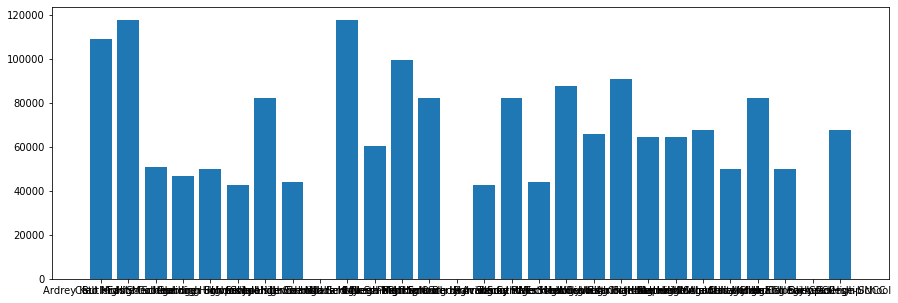

In [25]:
plt.bar(full_data['school'], full_data['2019_med_hh_inc'])
plt.xticks(rot=45)

AP Pass Rate
1
AP_pass_pct


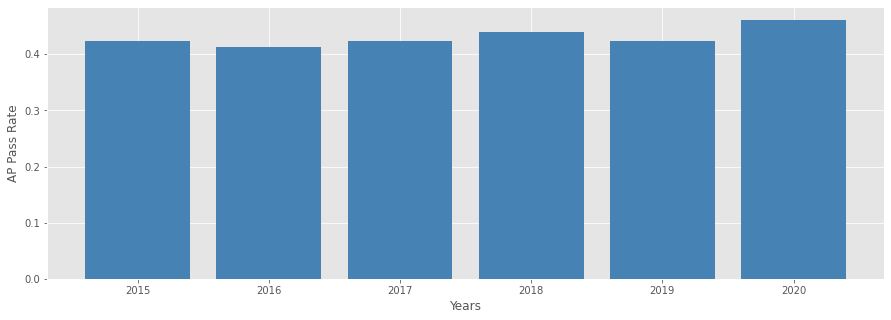

AP Participation Rate
2
AP_part_pct


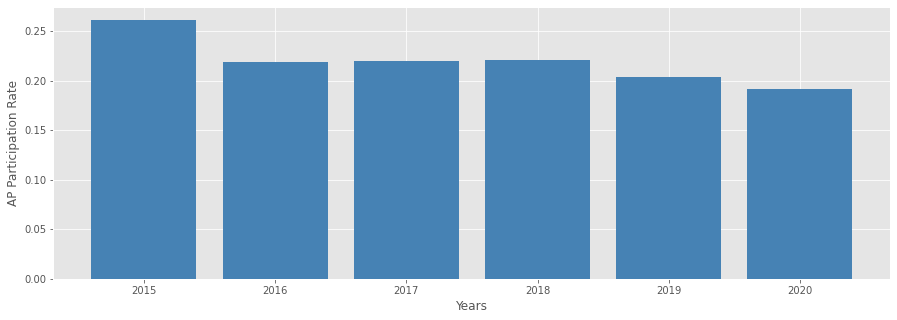

Total Counselors
3
total_counselors


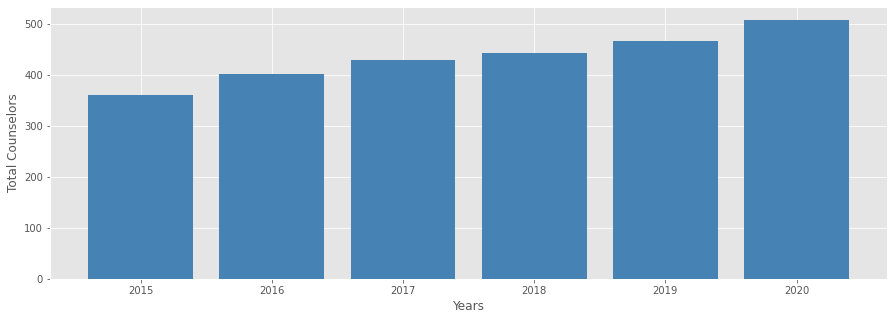

HS Grad Intention: Community College
4
int_commcoll


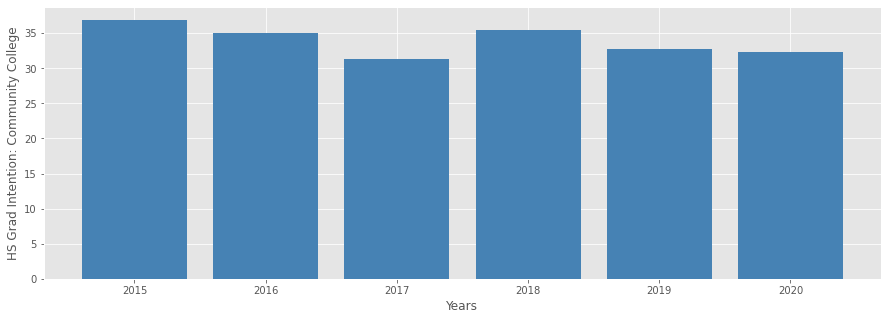

HS Grad Intention: Public University
5
int_pubsr


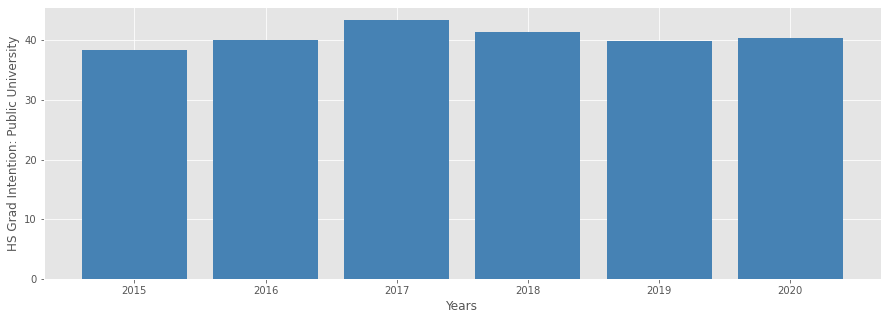

Econically Disadvantaged Students College Enrollment (%)
6
enroll_Disadvantaged


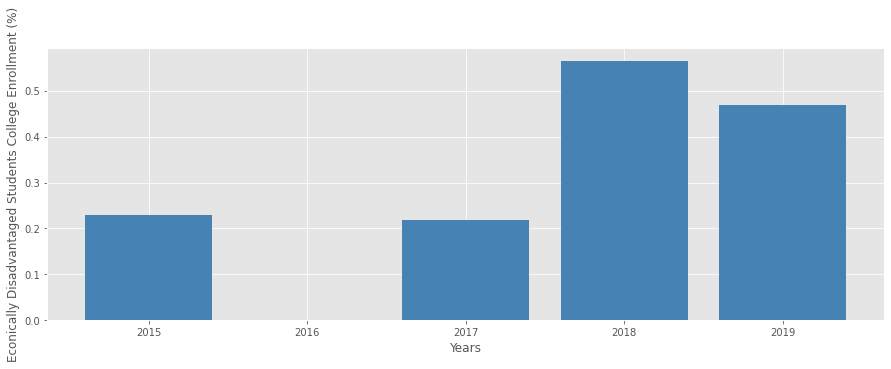

CTE Credentials Earned (%)


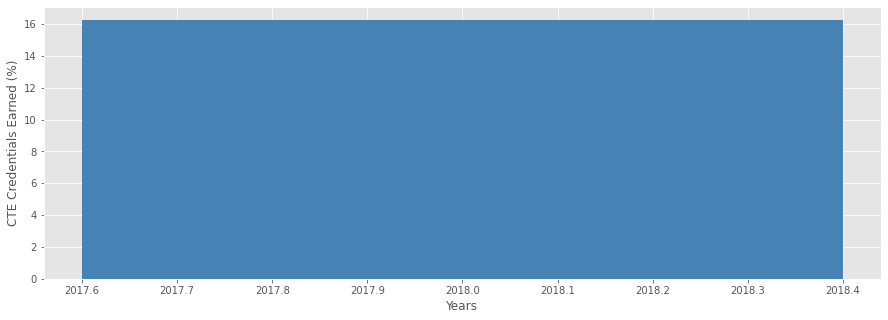

CTE Student Enrollment (%)


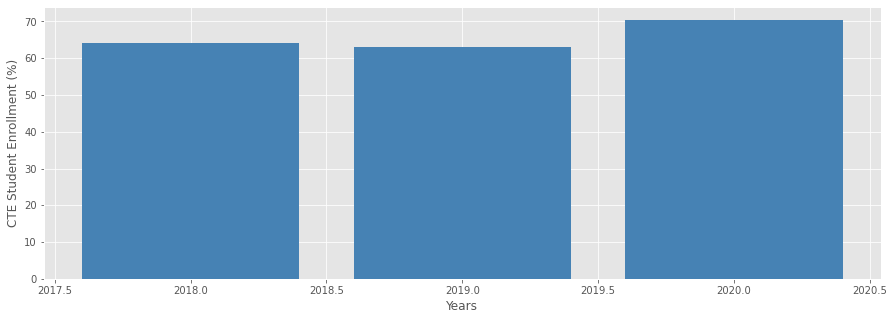

In [345]:
for columns in list(graph_data.columns)[1:]:
    current_label = y_labels[list(graph_data.columns).index(columns)]
    print(current_label)
    if columns == 'CTE_enroll_pct':
        data = graph_data.groupby('year', as_index=False)[columns].mean()
        plt.bar([2018, 2019, 2020], data[columns].loc[[3,4,5]], color='steelblue')
    

        plt.ylabel(current_label, size='12')
        plt.xlabel('Years', size='12')
        plt.savefig('Sprint2 tex\\images\\'+ current_label)
        plt.show()
    elif columns == 'CTE_cred_pct':
        data = graph_data.groupby('year', as_index=False)[columns].mean()
        plt.bar([2018], data[columns].loc[[3]], color='steelblue')
    

        plt.ylabel(current_label, size='12')
        plt.xlabel('Years', size='12')
        plt.savefig('Sprint2 tex\\images\\'+ current_label)
        plt.show()
    else:
        print(list(graph_data.columns).index(columns))
        print(columns)
        data = graph_data.groupby('year', as_index=False)[columns].mean()
        plt.bar(data['year'], data[columns], color='steelblue')
        

        plt.ylabel(current_label, size='12')
        plt.xlabel('Years', size='12')
        plt.savefig('Sprint2 tex\\images\\'+ current_label)
        plt.show()

In [343]:
def create_barplot(data):
    plt.bar(data['year'], data[x], color='steelblue')
    #plt.title('AP_pass_pct Average over time', size='18')
    plt.ylabel(y_labels[x], size='12')
    plt.xlabel('Years', size='12')
    plt.show()